### Heart Disease Analysis using the RandomForestClassifier from scikit-learn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [197]:
heart_disease = pd.read_csv('./datasets/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart_disease.shape

(303, 14)

In [4]:
#create X (Feature Matrix)
X = heart_disease.drop('target', axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [5]:
y= heart_disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### Another way to discard the target column

In [6]:
heart_disease.iloc[:,0:-1]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


### only selecting the target column

In [7]:
heart_disease.iloc[:,-1]

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

### chossing the right model or estimator

### using the random forest

In [8]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

#keep the default paramters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [9]:
#Fit the Model to Training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [11]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [12]:
#make a prediction
y_preds = clf.predict(X_test)

In [13]:
y_preds

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [14]:
y_test

97     1
10     1
293    0
67     1
136    1
      ..
185    0
193    0
60     1
148    1
105    1
Name: target, Length: 61, dtype: int64

In [15]:
#Evaluate the model
clf.score(X_train, y_train)

1.0

In [16]:
clf.score(X_test, y_test)

0.9016393442622951

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        22
           1       0.90      0.95      0.92        39

    accuracy                           0.90        61
   macro avg       0.90      0.88      0.89        61
weighted avg       0.90      0.90      0.90        61



In [18]:
confusion_matrix(y_test, y_preds)

array([[18,  4],
       [ 2, 37]], dtype=int64)

In [19]:
accuracy_score(y_test, y_preds)

0.9016393442622951

In [20]:
# improve the model
# 1: try different n_estimators
np.random.seed(1)
for i in range(10, 100, 10):
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print('the score is ', score)

the score is  0.8688524590163934
the score is  0.8852459016393442
the score is  0.8524590163934426
the score is  0.8688524590163934
the score is  0.9016393442622951
the score is  0.9016393442622951
the score is  0.8688524590163934
the score is  0.9016393442622951
the score is  0.9016393442622951


In [21]:
#save a model
import pickle
pickle.dump(clf, open('random_forest_model_1.pkl', 'wb'))

In [22]:
loaded_model = pickle.load(open('random_forest_model_1.pkl', 'rb'))
loaded_model.score(X_test, y_test)

0.9016393442622951

In [23]:
heart_disease.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

### getting data ready

#### split data into features (X) and labels (y)
#### filling and disregarding missing values
#### Converting non-numerical values to numerical values ( feature encoding)

### making data columns numerical

In [24]:
car_sales = pd.read_csv('./datasets/car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [25]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [26]:
car_sales.shape

(1000, 5)

### for machine learning we need call columns tobe numerical

In [27]:
X = car_sales.drop('Price', axis=1)
y = car_sales['Price']

In [28]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [29]:
y.head()

0    15323
1    19943
2    28343
3    13434
4    14043
Name: Price, dtype: int64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 4), (200, 4), (800,), (200,))

### building Machine learning Model

In [32]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

### due to non-numerical columns , there is error above

In [33]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                 one_hot,
                                 categorical_features)],
                               remainder='passthrough')
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [34]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [35]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [36]:
dummies = pd.get_dummies(car_sales[['Make','Colour','Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [37]:
## refit the model
np.random.seed(1)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                   y,
                                                   test_size=0.2)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [38]:
model.score(X_test, y_test)

0.31207113535105824

### Handling missing data 

#### Fill with missing values with some data
#### Remove them altogether

In [39]:
car_sales_missing = pd.read_csv('./datasets/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [40]:
car_sales_missing.isna()

,Make,Colour,Odometer (KM),Doors,Price
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
995,False,False,False,False,False
996,True,False,False,False,False
997,False,False,False,False,False
998,False,False,False,False,False


### show total number of missing values

In [41]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [42]:
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [43]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0


In [44]:
y.head()

0    15323.0
1    19943.0
2    28343.0
3    13434.0
4    14043.0
Name: Price, dtype: float64

In [45]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                 one_hot,
                                 categorical_features)],
                               remainder='passthrough')
transformed_X = transformer.fit_transform(X)
transformed_X

ValueError: Input contains NaN

### Above dataframe conatins NaN - lets get that out

### Fill missing data 

In [46]:
car_sales_missing['Doors'].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

In [47]:
car_sales_missing['Make'].fillna('missing', inplace=True)
car_sales_missing['Colour'].fillna('missing', inplace=True)
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(), inplace=True)
car_sales_missing['Doors'].fillna(4, inplace=True)

In [48]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

### remove rows with missing price

In [49]:
car_sales_missing.dropna(inplace=True)

In [50]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [51]:
len(car_sales_missing)

950

In [52]:
X = car_sales_missing.drop('Price', axis=1)
y= car_sales_missing['Price']

In [53]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                 one_hot,
                                 categorical_features)],
                               remainder='passthrough')
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Feature scaling
### links
#### https://medium.com/@rahul77349/feature-scaling-why-it-is-required-8a93df1af310
#### https://benalexkeen.com/feature-scaling-with-scikit-learn/
#### https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

In [54]:
car_sales_missing = pd.read_csv('./datasets/car-sales-extended-missing-data.csv')
car_sales_missing.head()


,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [55]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [56]:
car_sales_missing.dropna(subset=['Price'], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [57]:
X=car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']


In [58]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0


In [59]:
y.head()


0    15323.0
1    19943.0
2    28343.0
3    13434.0
4    14043.0
Name: Price, dtype: float64

### Filling missing value with scikit-learn

In [60]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

### Fill categorical values with 'missing' and mean

In [61]:
categorical_imputer  = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
numerical_imputer = SimpleImputer(strategy='mean')

### Define columns

In [62]:
categorical_features = ['Make', 'Colour']
door_features = ['Doors']
numerical_features = ['Odometer (KM)']

### create Imputer

In [63]:
imputer = ColumnTransformer([
    ('cat_imputer', categorical_imputer, categorical_features),
    ('door_imputer', door_imputer, door_features),
    ('num_imputer', numerical_imputer, numerical_features)
])

filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [64]:
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [65]:
car_sales_filled = pd.DataFrame(filled_X,
                               columns=['Make', 'Colour', 'Doors', 'Odometer (KM)'])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577


In [66]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [67]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                 one_hot,
                                 categorical_features)],
                               remainder='passthrough')
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

### Building the model

In [68]:
np.random.seed(1)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y,test_size=0.2)


In [69]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.25158720734485374

## choosing the right estimator/algorithm/model

### Picking ML Algo/Model for regression model

In [70]:
from sklearn.datasets import load_boston
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [71]:
boston_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
boston_df['target'] = pd.Series(boston['target'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [72]:
len(boston_df)

506

### lets try ridge regression, following the sklern map

In [73]:
from sklearn.linear_model import Ridge

np.random.seed(1)

X = boston_df.drop('target', axis=1)
y = boston_df['target']

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [75]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [76]:
y.head(), len(y)

(0    24.0
 1    21.6
 2    34.7
 3    33.4
 4    36.2
 Name: target, dtype: float64,
 506)

In [77]:
model = Ridge()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7655800611077146

### how to improve the score

#### lets use different model

In [78]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(1)
X = boston_df.drop('target', axis=1)
y=boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)


In [79]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9103126580548283

### Choosing estimator for classification problem

In [80]:
heart_disease = pd.read_csv('./datasets/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [81]:
len(heart_disease)

303

In [82]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

np.random.seed(1)
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [84]:
model = LinearSVC()
model.fit(X_train, y_train)
model.score(X_test, y_test)

C:\Users\Vikas\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7704918032786885

In [85]:
heart_disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

### Another model selection

### ensemble classifiers

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(1)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [88]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7868852459016393

### Fitting model to data

In [89]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### make predictions using ML Model
##### two methods 1: predict and predict_proba()

In [90]:
model.predict([1,2,3,4])

ValueError: Expected 2D array, got 1D array instead:
array=[1. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [91]:
model.predict(X_test)

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0], dtype=int64)

In [92]:
# comparing predictions to true value
y_preds = model.predict(X_test)
np.mean(y_preds == y_test)

0.7868852459016393

In [93]:
model.score(X_test, y_test)

0.7868852459016393

In [94]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.7868852459016393

### predict_proba()

In [95]:
model.predict_proba(X_test)[:5]

array([[0.84, 0.16],
       [0.21, 0.79],
       [0.81, 0.19],
       [0.98, 0.02],
       [0.85, 0.15]])

In [96]:
model.predict(X_test)[:5]

array([0, 1, 0, 0, 0], dtype=int64)

In [97]:
heart_disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

### Making predictions using regression model

In [98]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(1)

X = boston_df.drop('target',axis=1)
y = boston_df['target']


In [99]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [100]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: target, dtype: float64

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)

In [102]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9103126580548283

In [103]:
y_preds = model.predict(X_test)

In [104]:
y_preds[:5]

array([29.928, 26.982, 20.298, 20.61 , 19.804])

In [105]:
np.array(y_test[:10])

array([28.2, 23.9, 16.6, 22. , 20.8, 23. , 27.9, 14.5, 21.5, 22.6])

In [106]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.3109117647058848

### evaluating a model
Three methods
1: Estimator score method
2: The scoring parameter
3: Problem-Specific metric functions

In [107]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(1)
X = heart_disease.drop('target', axis=1)
y=heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [108]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7868852459016393

### Scoring paramter method

In [109]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(1)

X= heart_disease.drop('target', axis=1)
y=heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7868852459016393

In [110]:
cross_val_score(model, X, y, cv=5)

array([0.81967213, 0.86885246, 0.73770492, 0.81666667, 0.75      ])

In [111]:
cross_val_score(model, X, y, cv=10)

array([0.90322581, 0.80645161, 0.83870968, 0.9       , 0.83333333,
       0.8       , 0.73333333, 0.83333333, 0.73333333, 0.73333333])

In [112]:
np.random.seed(1)
model_single_score = model.score(X_test, y_test)
model_cross_val_score = np.mean(cross_val_score(model, X, y, cv=5))

model_single_score, model_cross_val_score

(0.7868852459016393, 0.8183060109289617)

### evaluation metrics
1. Accuracy
2. ROC
3. Confusion Matrix
4. Classification report

In [113]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(1)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

model = RandomForestClassifier(n_estimators=100)
cross_val_score = cross_val_score(model, X,y,cv=5)

In [114]:
np.mean(cross_val_score)

0.8183060109289617

### ROC

In [115]:
from sklearn.metrics import roc_curve
model.fit(X_train, y_train)
y_probs = model.predict_proba(X_test)
y_probs[:10]

array([[0.87, 0.13],
       [0.24, 0.76],
       [0.77, 0.23],
       [0.98, 0.02],
       [0.79, 0.21],
       [0.96, 0.04],
       [0.96, 0.04],
       [0.35, 0.65],
       [0.99, 0.01],
       [0.11, 0.89]])

In [116]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.13, 0.76, 0.23, 0.02, 0.21, 0.04, 0.04, 0.65, 0.01, 0.89])

### FRP, TRP, Threshold


In [117]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03333333, 0.03333333, 0.06666667, 0.06666667, 0.1       ,
       0.1       , 0.13333333, 0.13333333, 0.16666667, 0.23333333,
       0.23333333, 0.26666667, 0.26666667, 0.3       , 0.33333333,
       0.33333333, 0.36666667, 0.4       , 0.46666667, 0.46666667,
       0.53333333, 0.6       , 0.73333333, 0.83333333, 0.86666667,
       0.96666667, 1.        ])

In [118]:
tpr

array([0.        , 0.06451613, 0.09677419, 0.19354839, 0.35483871,
       0.35483871, 0.38709677, 0.41935484, 0.48387097, 0.48387097,
       0.51612903, 0.5483871 , 0.58064516, 0.61290323, 0.61290323,
       0.70967742, 0.70967742, 0.83870968, 0.87096774, 0.87096774,
       0.90322581, 0.90322581, 0.93548387, 0.93548387, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [119]:
#function to plot the ROC curve

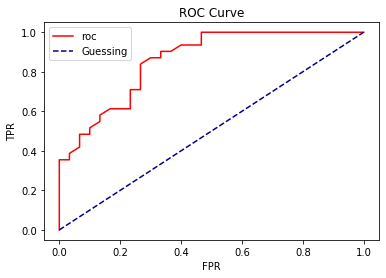

In [120]:
def plot_roc_curve(fpr, tpr):
  plt.plot(fpr, tpr, color='red', label='roc')
  plt.plot([0,1],[0,1], color='darkblue', linestyle='--', label='Guessing')
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.title('ROC Curve')
  plt.legend()
  plt.show()

plot_roc_curve(fpr, tpr)

In [121]:
#auc = area under curve
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8575268817204301

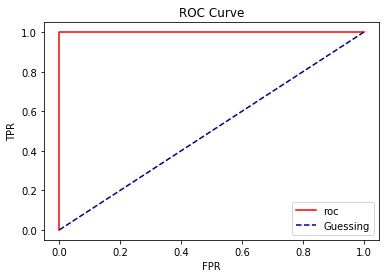

In [122]:
#plot perfect roc cureve
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [123]:
# perfect auc score
roc_auc_score(y_test, y_test)

1.0

In [124]:
## confusion matrix

In [125]:
from sklearn.metrics import confusion_matrix
y_preds = model.predict(X_test)
y_preds

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0], dtype=int64)

In [126]:
confusion_matrix(y_test, y_preds)

array([[21,  9],
       [ 4, 27]], dtype=int64)

In [127]:
# visualize the confusion matrix
pd.crosstab(y_test, y_preds, rownames=['Actual Lables'], colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Lables,,
0,21,9
1,4,27


In [128]:
len(y_preds)

61

In [129]:
21+9+4+27

61

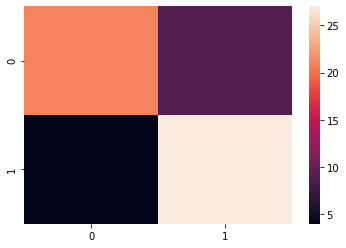

In [130]:
# confusion matrix using seaborn heatmap
conf_mat = confusion_matrix(y_test, y_preds)
sns.heatmap(conf_mat)

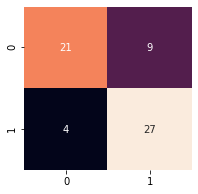

In [131]:
def conf_mat_plot(conf_mat):
  fig,ax = plt.subplots(figsize=(3,3))
  ax = sns.heatmap(conf_mat, annot=True, cbar=False)

conf_mat_plot(conf_mat)

[[21  9]
 [ 4 27]]


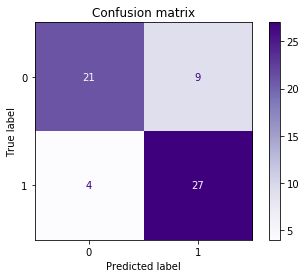

In [132]:
from sklearn.metrics  import plot_confusion_matrix


disp = plot_confusion_matrix(model, X_test, y_test,
                                 cmap=plt.cm.Purples)
disp.ax_.set_title('Confusion matrix')

print(disp.confusion_matrix)

plt.show()

In [133]:
## classification reports

In [134]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.84      0.70      0.76        30
           1       0.75      0.87      0.81        31

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



In [135]:
# where the precision and recall become valuable

disease_true = np.zeros(10000)
disease_true[0]=1

disease_preds = np.zeros(10000)

pd.DataFrame(classification_report(disease_true, disease_preds,output_dict=True))

C:\Users\Vikas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


In [136]:
### Evaluating the regression models

In [137]:
np.random.seed(1)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [138]:
X = boston_df.drop('target',axis=1)
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [139]:
y = boston_df['target']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: target, Length: 506, dtype: float64

In [140]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [141]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [142]:
# R Squared is the default matrix , predicted below
model.score(X_test, y_test)

0.9103126580548283

In [143]:
# model evaluation
# 1: R Squared
# 2: Mean Absolute Error
# 3: Mean Squared Error

In [144]:
from sklearn.metrics import r2_score

y_test_mean = np.full(len(y_test), y_test.mean())
y_test_mean

array([22.5745098, 22.5745098, 22.5745098, 22.5745098, 22.5745098,
       22.5745098, 22.5745098, 22.5745098, 22.5745098, 22.5745098,
       22.5745098, 22.5745098, 22.5745098, 22.5745098, 22.5745098,
       22.5745098, 22.5745098, 22.5745098, 22.5745098, 22.5745098,
       22.5745098, 22.5745098, 22.5745098, 22.5745098, 22.5745098,
       22.5745098, 22.5745098, 22.5745098, 22.5745098, 22.5745098,
       22.5745098, 22.5745098, 22.5745098, 22.5745098, 22.5745098,
       22.5745098, 22.5745098, 22.5745098, 22.5745098, 22.5745098,
       22.5745098, 22.5745098, 22.5745098, 22.5745098, 22.5745098,
       22.5745098, 22.5745098, 22.5745098, 22.5745098, 22.5745098,
       22.5745098, 22.5745098, 22.5745098, 22.5745098, 22.5745098,
       22.5745098, 22.5745098, 22.5745098, 22.5745098, 22.5745098,
       22.5745098, 22.5745098, 22.5745098, 22.5745098, 22.5745098,
       22.5745098, 22.5745098, 22.5745098, 22.5745098, 22.5745098,
       22.5745098, 22.5745098, 22.5745098, 22.5745098, 22.5745

In [145]:
y_test.mean()

22.574509803921572

In [146]:
r2_score(y_test, y_test_mean)

-2.220446049250313e-16

In [147]:
r2_score(y_test,y_test)

1.0

In [148]:
## mean absolute error

In [149]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
#mae = mean absolute error
mae = mean_absolute_error(y_test, y_preds)
mae

2.3109117647058848

In [150]:
df = pd.DataFrame({
    'actual_values':y_test,
    'predicted_values':y_preds
})
df

,actual_values,predicted_values
307,28.2,29.928
343,23.9,26.982
47,16.6,20.298
67,22.0,20.610
362,20.8,19.804
...,...,...
92,22.9,23.624
224,44.8,42.206
110,21.7,20.295
426,10.2,15.735


In [151]:
df['differences'] = df['predicted_values'] - df['actual_values']
df

,actual_values,predicted_values,differences
307,28.2,29.928,1.728
343,23.9,26.982,3.082
47,16.6,20.298,3.698
67,22.0,20.610,-1.390
362,20.8,19.804,-0.996
...,...,...,...
92,22.9,23.624,0.724
224,44.8,42.206,-2.594
110,21.7,20.295,-1.405
426,10.2,15.735,5.535


In [152]:
## mean squared error (mse)

In [153]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

8.863565872549033

In [154]:
square = np.square(df['differences'])
square.mean()

8.863565872549032

### using scoring paramter

In [155]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(1)

In [156]:
X = heart_disease.drop('target',axis=1)
y = heart_disease['target']

In [157]:
model = RandomForestClassifier()

In [158]:
np.random.seed(1)
cv_acc = cross_val_score(model, X, y, cv=5)
cv_acc

array([0.80327869, 0.90163934, 0.80327869, 0.81666667, 0.76666667])

In [159]:
cv_acc.mean()

0.8183060109289617

In [160]:
np.random.seed(1)
cv_precision = cross_val_score(model, X, y , cv=5, scoring='precision')
cv_precision

array([0.8       , 0.93548387, 0.83870968, 0.84375   , 0.74358974])

In [161]:
np.mean(cv_precision)

0.8323066583953681

In [162]:
np.random.seed(1)
cv_recall = cross_val_score(model, X, y, cv=5, scoring='recall')
cv_recall

array([0.84848485, 0.87878788, 0.78787879, 0.81818182, 0.87878788])

In [163]:
np.mean(cv_recall)

0.8424242424242424

In [164]:
np.random.seed(1)
cv_f1 = cross_val_score(model, X, y, cv=5, scoring='f1')
cv_f1

array([0.82352941, 0.90625   , 0.8125    , 0.83076923, 0.80555556])

In [165]:
np.mean(cv_f1)

0.8357208396178984

### for regression

In [166]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [167]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(1)
model = RandomForestRegressor()

In [168]:
X = boston_df.drop('target', axis=1)
y = boston_df['target']

In [169]:
np.random.seed(1)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring=None)
cv_r2

array([0.7668182 , 0.86015336, 0.73179921, 0.47974641, 0.3059393 ])

In [170]:
np.mean(cv_r2)

0.6288912940377429

In [171]:
np.random.seed(1)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring='r2')
cv_r2

array([0.7668182 , 0.86015336, 0.73179921, 0.47974641, 0.3059393 ])

In [172]:
np.mean(cv_r2)

0.6288912940377429

In [173]:
cv_mae = cross_val_score(model, X, y , cv=5, scoring='neg_mean_absolute_error')
cv_mae

array([-2.09136275, -2.69093069, -3.43211881, -3.83375248, -3.16248515])

In [174]:
cv_mse = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse

array([ -7.95104097, -13.39341552, -19.46532384, -47.1764787 ,
       -19.07341201])

In [175]:
np.mean(cv_mse)

-21.41193420995922

### metric function
* classification evaluations

In [176]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(1)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']



In [177]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [178]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [179]:
y_preds = model.predict(X_test)
y_preds

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0], dtype=int64)

In [180]:
accuracy_score(y_test, y_preds)

0.7868852459016393

In [181]:
precision_score(y_test, y_preds)

0.7647058823529411

In [182]:
recall_score(y_test, y_preds)

0.8387096774193549

In [183]:
f1_score(y_test, y_preds)

0.7999999999999999

### ** regression evaluation function

In [184]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(1)

model = RandomForestRegressor()

In [185]:
X = boston_df.drop('target', axis=1)
y = boston_df['target']

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [187]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [188]:
y_preds = model.predict(X_test)
y_preds

array([29.928, 26.982, 20.298, 20.61 , 19.804, 19.645, 27.841, 18.858,
       20.3  , 23.584, 28.877, 31.107, 20.619, 20.029, 20.336, 23.216,
       12.035, 40.376, 24.703, 14.03 , 20.146, 16.517, 24.824, 23.774,
       25.551,  9.299, 14.983, 20.218, 43.288, 12.219, 25.614, 19.58 ,
       46.765, 16.441, 23.527, 21.003, 15.277, 33.171, 12.939, 19.924,
       24.275, 23.387, 26.295, 16.326, 15.893, 11.142, 48.536, 11.915,
       21.084, 18.651, 23.699, 21.298, 25.353, 20.994, 10.881, 23.949,
       11.539, 23.166, 18.851, 41.997, 14.787, 26.61 , 12.78 , 14.778,
       18.469, 33.075, 41.355, 24.973, 21.401, 20.764, 23.942,  7.132,
       18.513, 21.055, 19.412, 20.253, 43.108, 24.681, 27.555, 33.133,
       17.262, 20.716, 34.192, 12.025, 24.305, 25.825, 14.783, 24.7  ,
       19.873, 17.436, 27.457, 45.444, 16.136, 21.286, 15.87 , 20.405,
       23.623, 23.624, 42.206, 20.295, 15.735, 15.662])

In [189]:
r2_score(y_test, y_preds)

0.9103126580548284

In [190]:
mean_absolute_error(y_test, y_preds)

2.3109117647058848

In [191]:
mean_squared_error(y_test, y_preds)

8.863565872549033

### improving the ML Model
* first predictions are baseline predictions
* first model is baseline model

In [192]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model.get_params()



{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 3 ways to adjust hyperparameters
* by hand
* randomly with RandomSearchCV
* Exhaustively with GridSearchCV

### Tuning Hyperparamters by hand

### lets make 3 sets = training, validation, test
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [194]:
def evaluate_preds(y_true, y_preds):
    '''
    comparision btw the y_true and y_preds
    '''
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {
        'accuracy': round(accuracy, 2),
        'precision': round(precision, 2),
        'recall': round(recall, 2),
        'f1': round(f1, 2)
    }
    print(f'accuracy {accuracy*100:.2f}%')
    print(f'precision {precision*100:.2f}%')
    print(f'recall {recall*100:.2f}%')
    print(f'f1 {f1*100:.2f}%')
    
    return metric_dict

In [195]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [198]:
# shuffle the heart_disease data
heart_disease_shuffled = heart_disease.sample(frac=1)
heart_disease_shuffled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
172,58,1,1,120,284,0,0,160,0,1.8,1,0,2,0
12,49,1,1,130,266,0,1,171,0,0.6,2,0,2,1
240,70,1,2,160,269,0,1,112,1,2.9,1,1,3,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3,0


In [199]:
X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

In [200]:
# split the data into training, validation and test

train_split = round(0.7 * len(heart_disease_shuffled)) # 70% data
validation_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% data

X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:validation_split], y[train_split:validation_split]
X_test, y_test = X[validation_split:], y[validation_split:]

In [201]:
len(X_train), len(X_valid), len(X_test)

(212, 45, 46)

In [202]:
model = RandomForestClassifier()

In [203]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [205]:
model.fit(X_train, y_train)
# baseline predictions
y_preds = model.predict(X_valid)
y_preds

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0], dtype=int64)

In [206]:
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

accuracy 86.67%
precision 80.95%
recall 89.47%
f1 85.00%


{'accuracy': 0.87, 'precision': 0.81, 'recall': 0.89, 'f1': 0.85}

### second classifier with hyperparameters

In [207]:
model_1 = RandomForestClassifier(max_depth=10)
model_1.fit(X_train, y_train)

y_preds_1 = model_1.predict(X_valid)

model_1_metrics = evaluate_preds(y_valid, y_preds_1)
model_1_metrics

accuracy 86.67%
precision 84.21%
recall 84.21%
f1 84.21%


{'accuracy': 0.87, 'precision': 0.84, 'recall': 0.84, 'f1': 0.84}